**Task 2**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('Dataset2 .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,5701052,Applebee's,214,Abu Dhabi,"Level 3, Mushrif Mall, Al Mushrif, Abu Dhabi","Mushrif Mall, Al Mushrif","Mushrif Mall, Al Mushrif, Abu Dhabi",54.413141,24.434099,"American, Mexican, Seafood",...,Emirati Diram(AED),No,Yes,No,No,4,4.0,Green,Very Good,205
1,5701548,Bait El Khetyar,214,Abu Dhabi,"Al Najda Street, Najda, Abu Dhabi",Najda,"Najda, Abu Dhabi",54.371434,24.488411,"Lebanese, Arabian, Middle Eastern",...,Emirati Diram(AED),No,Yes,No,No,2,4.0,Green,Very Good,380
2,5700052,Cho Gao - Crowne Plaza Abu Dhabi,214,Abu Dhabi,"Crowne Plaza Abu Dhabi, Sheikh Hamdan Bin Moha...","Crowne Plaza Abu Dhabi, Al Markaziya","Crowne Plaza Abu Dhabi, Al Markaziya, Abu Dhabi",54.365694,24.491235,"Thai, Japanese, Chinese, Indonesian, Vietnamese",...,Emirati Diram(AED),Yes,Yes,No,No,4,4.4,Green,Very Good,246
3,18212135,Denny's,214,Abu Dhabi,"Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382797,24.495503,American,...,Emirati Diram(AED),No,No,No,No,4,4.6,Dark Green,Excellent,207
4,5704255,Famous Dave's Barbecue,214,Abu Dhabi,"Near The One, Level 3, Abu Dhabi Mall, Tourist...","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah)","Abu Dhabi Mall, Tourist Club Area (Al Zahiyah...",54.382946,24.495693,American,...,Emirati Diram(AED),No,Yes,No,No,4,4.6,Dark Green,Excellent,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,7100788,The Crab Shack,148,Wellington City,"15 Jervois Quay, Queens Wharf, Wellington Cent...",Wellington Central,"Wellington Central, Wellington City",174.779167,-41.284833,"Seafood, Kiwi",...,NewZealand($),No,No,No,No,4,4.1,Green,Very Good,229
9547,7101042,The Hangar,148,Wellington City,"171-177 Willis Street, Te Aro, Wellington City",Te Aro,"Te Aro, Wellington City",174.773933,-41.290801,Cafe,...,NewZealand($),No,No,No,No,3,4.6,Dark Green,Excellent,171
9548,7100938,wagamama,148,Wellington City,"33 Customhouse Quay, Wellington Central, Welli...",Wellington Central,"Wellington Central, Wellington City",174.779224,-41.283034,"Japanese, Asian",...,NewZealand($),No,No,No,No,4,3.7,Yellow,Good,131
9549,17559793,Fishpatrick's Crabby Cafe,216,Winchester Bay,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,"Winchester Bay, Winchester Bay",-124.175346,43.678998,"Burger, Seafood, Steak",...,Dollar($),No,No,No,No,2,3.2,Orange,Average,16


In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

**Identify the restaurants with the highest and lowest number of votes**

In [14]:
kpi = df[["Restaurant Name", "Votes"]]
kpi

,Restaurant Name,Votes
0,Applebee's,205
1,Bait El Khetyar,380
2,Cho Gao - Crowne Plaza Abu Dhabi,246
3,Denny's,207
4,Famous Dave's Barbecue,376
...,...,...
9546,The Crab Shack,229
9547,The Hangar,171
9548,wagamama,131
9549,Fishpatrick's Crabby Cafe,16


In [17]:
highest_votes = kpi.loc[kpi["Votes"].idxmax()]
print("Restaurant with the Highest Votes:")
print(highest_votes)

lowest_votes = kpi.loc[kpi["Votes"].idxmin()]
print("\nRestaurant with the Lowest Votes:")
print(lowest_votes)

Restaurant with the Highest Votes:
Restaurant Name     Toit
Votes              10934
Name: 243, dtype: object

Restaurant with the Lowest Votes:
Restaurant Name    Aggarwal's Bikaner Mishthan Bhandar
Votes                                                0
Name: 657, dtype: object


In [19]:
top_3_restaurants = kpi.nlargest(3, "Votes")
print("\nTop 3 Restaurants by Votes:")
print(top_3_restaurants)

bottom_3_restaurants = kpi.nsmallest(3, "Votes")
print("\nBotton 3 Restaurants by Votes")
print(bottom_3_restaurants)


Top 3 Restaurants by Votes:
       Restaurant Name  Votes
243               Toit  10934
244           Truffles   9667
4709  Hauz Khas Social   7931

Botton 3 Restaurants by Votes
                         Restaurant Name  Votes
657  Aggarwal's Bikaner Mishthan Bhandar      0
661                               Angaar      0
665                      Apna Restaurant      0


<function matplotlib.pyplot.show(close=None, block=None)>

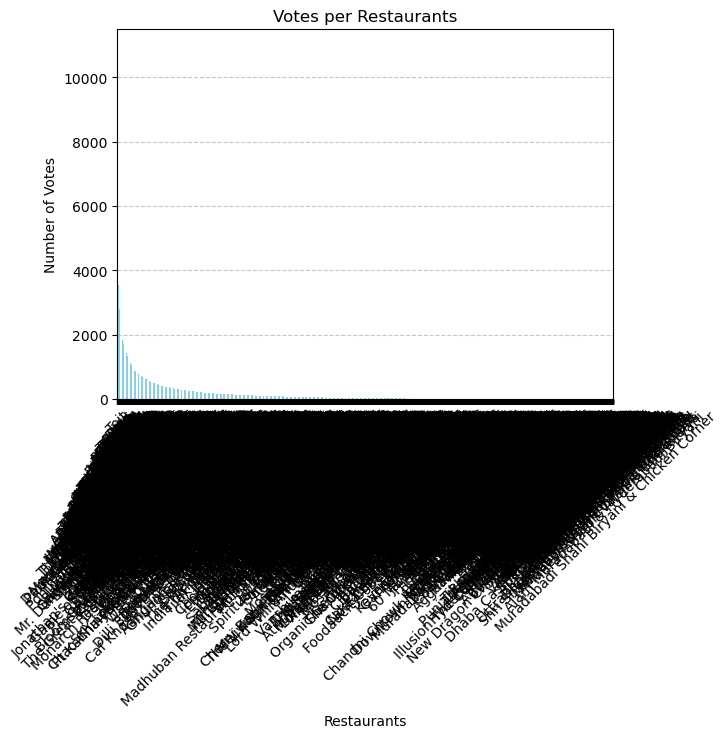

In [31]:
kpi.sort_values("Votes", ascending = False).plot(
    x = "Restaurant Name", y = "Votes", kind = "bar", color = "skyblue", legend = False
)
plt.title("Votes per Restaurants")
plt.xlabel("Restaurants")
plt.ylabel("Number of Votes")
plt.xticks(rotation = 45)
plt.grid(axis= "y", linestyle = "--", alpha = 0.7)
plt.show

**Analyze if there is a correlation between the number of votes and ratings of restaurants**

In [34]:
kpi = df[["Restaurant Name", "Votes", "Aggregate rating"]]
kpi

,Restaurant Name,Votes,Aggregate rating
0,Applebee's,205,4.0
1,Bait El Khetyar,380,4.0
2,Cho Gao - Crowne Plaza Abu Dhabi,246,4.4
3,Denny's,207,4.6
4,Famous Dave's Barbecue,376,4.6
...,...,...,...
9546,The Crab Shack,229,4.1
9547,The Hangar,171,4.6
9548,wagamama,131,3.7
9549,Fishpatrick's Crabby Cafe,16,3.2


In [36]:
correlation = kpi["Votes"].corr(kpi["Aggregate rating"])
print(f"The correlation between the Votes and the Rating is: {correlation}")

The correlation between the Votes and the Rating is: 0.31369058419541135


Coefficient: 0.0011057821356717404
Intercept: 2.4928620177244505


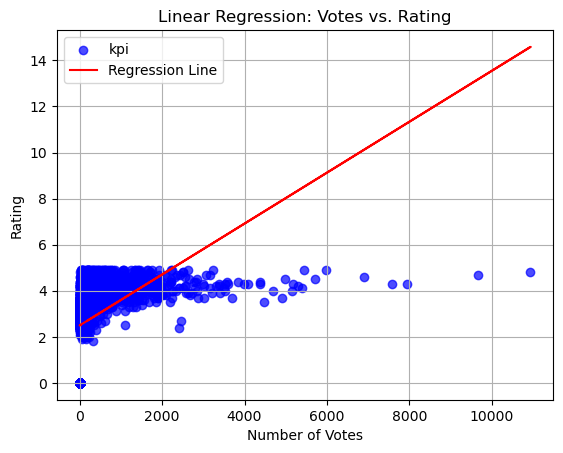

In [40]:
from sklearn.linear_model import LinearRegression

x = kpi["Votes"].values.reshape(-1, 1)
y = kpi["Aggregate rating"]

model = LinearRegression()
model.fit(x, y)

print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

predicted = model.predict(x)

plt.scatter(kpi["Votes"], kpi["Aggregate rating"], color = "blue", alpha = 0.7, label = "kpi")
plt.plot(kpi["Votes"], predicted, color = "red", label = "Regression Line")
plt.title("Linear Regression: Votes vs. Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.legend()
plt.grid(True)
plt.show()